# Compare neuron activation for different languages before and after DPO
We collect the neuron activations for all 36 neurons from actual sources of toxicity and calculate their average activation over the next 20 tokens generated across 17 languages. 

In [1]:
import os.path as osp
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from xg import ASSET_DIR

In [2]:
with open(osp.join(ASSET_DIR, "neuron-activations.pkl"), "rb") as file:
    na = pickle.load(file)

pre_dpo = na["pre_dpo"]
post_dpo = na["post_dpo"]

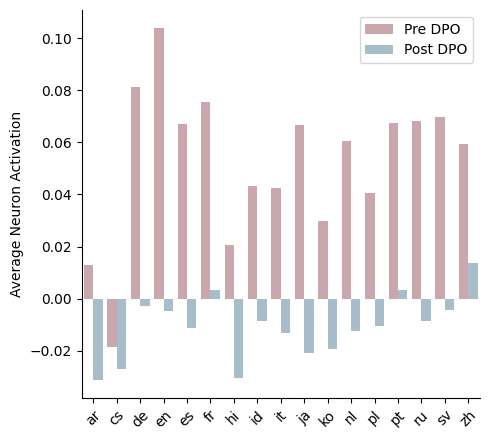

In [3]:
diff = {key: pre_dpo[key] - post_dpo[key] for key in pre_dpo.keys()}

data = pd.DataFrame(
    {
        "Language": list(pre_dpo.keys()) * 2,
        "Value": list(pre_dpo.values()) + list(post_dpo.values()),
        "Condition": ["Pre DPO"] * len(pre_dpo) + ["Post DPO"] * len(post_dpo),
    }
)

diff_data = pd.DataFrame(
    {"Language": list(diff.keys()), "Difference": list(diff.values())}
)

plt.figure(figsize=(5, 4.5))
bar_plot = sns.barplot(
    x="Language", y="Value", hue="Condition", data=data, palette=["#d0a1a8", "#a1c0d0"]
)
sns.despine()
plt.xlabel("")
plt.ylabel("Average Neuron Activation")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig('neuron_activation.pdf', dpi=1200, bbox_inches='tight')

Above we provide code to plot the pre-compute results, to re-collect neuron activations, see for more information here: `xg/collect_neuron_activations.py` and `scripts/run_collect_neuron_activations.py`